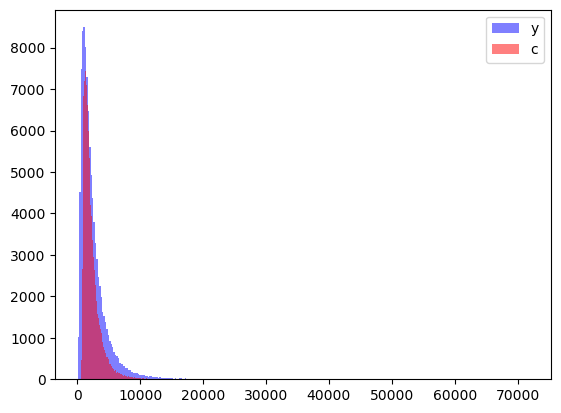

Average of y:  2487.728022333704
Variance of y:  5482934.02441623
Gini coefficient of y:  0.4263148068957796
Average of c:  2238.9174064911376
Variance of c:  2306356.299868491
Gini coefficient of c:  0.3136639375850171


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.polynomial.polynomial import polyfit

# Simulation parameters
N = 100000
mu = 7.5
sigma = 0.8

# Simulate the income y
y = np.exp(mu + sigma * np.random.randn(N))

# Compute the average, variance, and Gini coefficient of y
y_mean = np.mean(y)
y_var = np.var(y)
y_sorted = np.sort(y)
y_cumulative = np.cumsum(y_sorted) / np.sum(y_sorted)
y_gini = 1 + (1/N) - 2 * np.sum(y_cumulative) / N

# Compute the consumption c
c = (y**0.8) + 0.5*y + 500

# Compute the average, variance, and Gini coefficient of c
c_mean = np.mean(c)
c_var = np.var(c)
c_sorted = np.sort(c)
c_cumulative = np.cumsum(c_sorted) / np.sum(c_sorted)
c_gini = 1 + (1/N) - 2 * np.sum(c_cumulative) / N

# Plot the distributions of y and c
bins = int(np.sqrt(N))
plt.hist(y, bins=bins, alpha=0.5, label='y', color='blue')
plt.hist(c, bins=bins, alpha=0.5, label='c', color='red')
plt.legend()
plt.show()

# Print the results
print("Average of y: ", y_mean)
print("Variance of y: ", y_var)
print("Gini coefficient of y: ", y_gini)
print("Average of c: ", c_mean)
print("Variance of c: ", c_var)
print("Gini coefficient of c: ", c_gini)


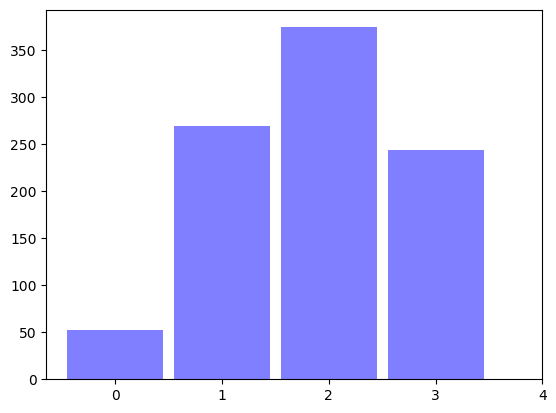

Expected value using Monte Carlo integration:  5.726
Analytical result:  4


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# a. Simulate a binomial distribution
n = 4
p = 0.5
binomial_distribution = binom(n, p)
sample = binomial_distribution.rvs(1000)

# Plot the resulting distribution
plt.hist(sample, bins=np.arange(n + 1) - 0.5, alpha=0.5, rwidth=0.9, color='blue')
plt.xticks(np.arange(n + 1))
plt.show()

# b. Compute the expected value using Monte Carlo integration
lambda_param = 2
poisson_distribution = np.random.poisson(lambda_param, 1000)
g = poisson_distribution**2
expected_value = np.mean(g)

# Compare with the analytical result
analytical_result = lambda_param**2
print("Expected value using Monte Carlo integration: ", expected_value)
print("Analytical result: ", analytical_result)

# Explanation
# The result from the Monte Carlo integration is an estimate of the expected value
# of the function g(x) = x^2 for x following a Poisson distribution with λ = 2.
# The estimate may not be equal to the analytically computed expected value, which is λ^2 = 2^2 = 4,
# because the estimate is based on a sample and is subject to random fluctuations.
# The difference between the estimate and the analytically computed expected value can be reduced
# by increasing the sample size in the Monte Carlo integration.


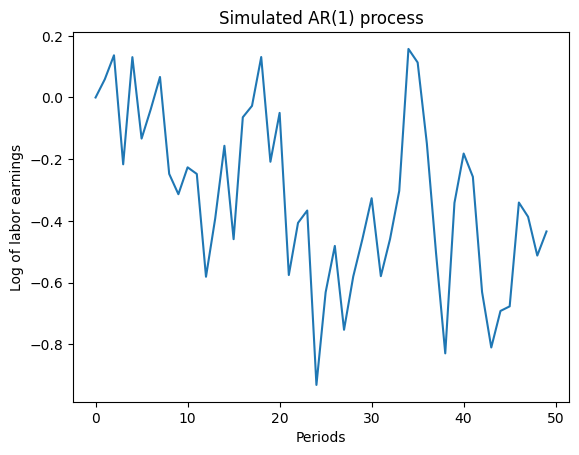

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ar1_process(T, rho, y0, sigma_ε):
    y = np.zeros(T)
    y[0] = y0
    for t in range(1, T):
        y[t] = rho * y[t-1] + np.random.normal(0, sigma_ε)
    return y

T = 50
rho = 0.95
y0 = 0
sigma_ε = 0.25
y = simulate_ar1_process(T, rho, y0, sigma_ε)

plt.plot(y)
plt.xlabel("Periods")
plt.ylabel("Log of labor earnings")
plt.title("Simulated AR(1) process")
plt.show()

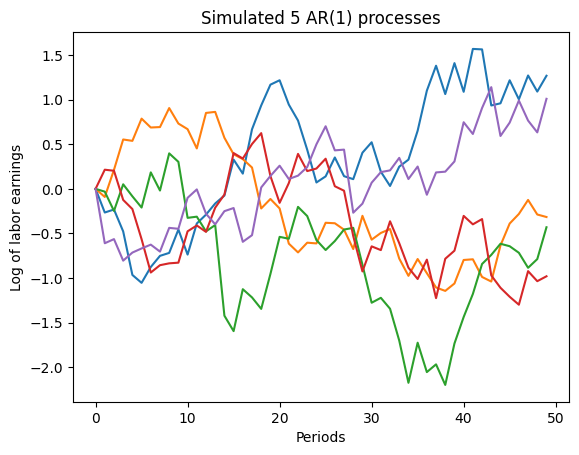

In [4]:
def simulate_n_ar1_processes(N, T, rho, y0, sigma_ε):
    y_all = np.zeros((N, T))
    for i in range(N):
        y = simulate_ar1_process(T, rho, y0, sigma_ε)
        y_all[i, :] = y
    return y_all

N = 5
y_all = simulate_n_ar1_processes(N, T, rho, y0, sigma_ε)

for i in range(N):
    plt.plot(y_all[i, :])

plt.xlabel("Periods")
plt.ylabel("Log of labor earnings")
plt.title("Simulated 5 AR(1) processes")
plt.show()
